# 对细胞类型富集结果的分析
### 1. 不同组织上显著的细胞类型的数量
### 2. 显著的细胞类型出现在多少个组织上
### 3. 每个组织上显著和不显著的细胞类型数量

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import os
import time

### （core，peri）【top10%】 lcczscore
### *显著相关的细胞类型在哪些组织上

In [40]:
# results = pd.read_excel(r"E:\0_单细胞1\results\results.xlsx",sheet_name="perilcczscore-celltype")
results = pd.read_excel(r"E:\0_单细胞1\results\results.xlsx",sheet_name="corelcczscore-celltype")
# pvalue小于0.005的细胞类型
results_related = results[results["fisher's pvalue"]<0.005]
results_related_grouped = results_related.groupby("tissue").count()

In [42]:
import plotly.graph_objects as go

# 创建示例数据
labels = results_related_grouped.index
values = results_related_grouped["celltype"]

# 创建扇形图
fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+value')])

# 更新布局
fig.update_layout(title='Corelcczscore-celltype',
                    width=400,  # 宽度
                    height=500,  # 高度
                  showlegend=False  # 不显示图例
                        )
# fig.update_layout(title='Perilcczscore-celltype',
#                     width=400,  # 宽度
#                     height=500,  # 高度
#                   showlegend=False  # 不显示图例
#                         )
# 显示图形
fig.show()

### 显著相关的细胞类型在多少个组织上

In [9]:
results = pd.read_excel(r"E:\0_单细胞1\results\results.xlsx",sheet_name="perilcczscore-celltype")
# results = pd.read_excel(r"E:\0_单细胞1\results\results.xlsx",sheet_name="corelcczscore-celltype")
# pvalue小于0.005的细胞类型
results_related = results[results["fisher's pvalue"]<0.005]
results_related_grouped = results_related.groupby("celltype").count()

df = pd.DataFrame(results_related_grouped[results_related_grouped['tissue'] > 1]['tissue'])
# 只出现在一个组织中的细胞类型数量，这些细胞类型统称为other
df.loc["other"] = len(results_related_grouped[results_related_grouped['tissue'] == 1])
df_sorted = df.sort_values("tissue")

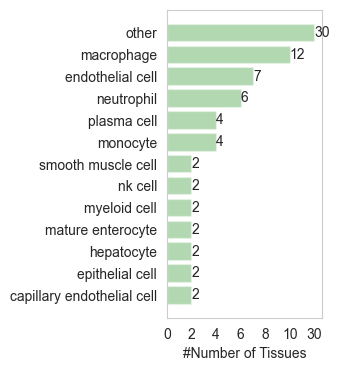

In [11]:
import matplotlib.pyplot as plt
# 创建示例数据
labels = df_sorted.index
values = df_sorted["tissue"]
fig = plt.figure(figsize=(2,4))
# 根据条件设置每个柱子的高度（长度）
heights = []
for value in values:
    if value <= 10:
        heights.append(value)  # 每个长度为一个单位
    else:
        heights.append(10 + (value - 10) // 10)  # 每5个长度为一个单位
bars = plt.barh(labels, heights,color = "green" ,alpha = 0.3)
# bars = plt.barh(labels, heights,color = "green")
# 绘制柱状图
# 添加柱子上的真实值标签
for bar, value in zip(bars, values):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, str(value), ha='left', va='center')

# 设置新的 x 轴刻度标签
plt.xticks([0,2,4,6,8,10,12], [0,2,4,6,8,10,30], fontsize=10)
plt.xlabel("#Number of Tissues")
# 显示图形
plt.grid(False)
plt.show()

### 统计每个组织中显著和不显著的细胞类型数量

In [2]:
# results = pd.read_excel(r"E:\0_单细胞1\results\results.xlsx",sheet_name="perilcczscore-celltype")
results = pd.read_excel(r"E:\0_单细胞1\results\results.xlsx",sheet_name="corelcczscore-celltype")
# pvalue小于0.005的细胞类型
results_related = results[results["fisher's pvalue"]<=0.005]
results_related_grouped = results_related.groupby("tissue").count()["celltype"]
# pvalue大于0.005的细胞类型
results_notrelated = results[results["fisher's pvalue"]>0.005]
results_related_notgrouped = results_notrelated.groupby("tissue").count()["celltype"]
# 每个组织中显著和不显著的细胞类型数量
result_rela_notrela_ctnums = pd.concat([results_related_grouped,results_related_notgrouped],axis = 1)
result_rela_notrela_ctnums.columns = ["related","not related"]
result_rela_notrela_ctnums.fillna(0, inplace=True)
result_rela_notrela_ctnums_sorted = result_rela_notrela_ctnums.sort_values("related",ascending=True)

# 显著的组织
results_tissue = pd.read_excel(r"E:\0_单细胞1\results\results.xlsx",sheet_name="corelcczscore-tissue")
results_tissue_related_tissues = list(results_tissue[results_tissue["fisher's pvalue"]<=0.005]["tissue"])

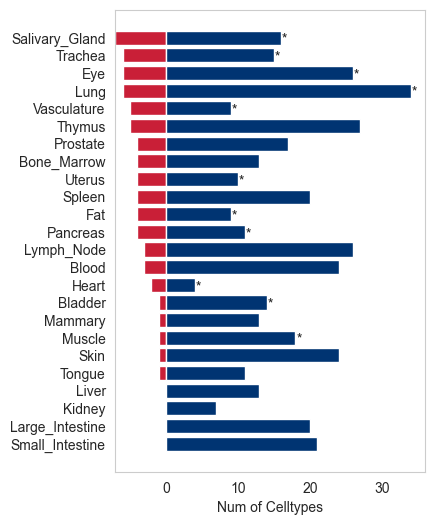

In [5]:
import matplotlib.pyplot as plt
# fig = plt.figure(figsize=(4,6),dpi = 150)
fig, ax = plt.subplots(figsize=(4, 6))  # 设置图形大小
categories = result_rela_notrela_ctnums_sorted.index
star_categories = results_tissue_related_tissues
plt.barh(result_rela_notrela_ctnums_sorted.index, result_rela_notrela_ctnums_sorted["related"], left=-np.array(result_rela_notrela_ctnums_sorted["related"]), color='#c91f37')
plt.barh(result_rela_notrela_ctnums_sorted.index, result_rela_notrela_ctnums_sorted["not related"], left = 0, color='#003472')
plt.xlabel("Num of Celltypes")
# 添加星号
# 添加星号
for i, category in enumerate(categories):
    if category in star_categories:
        ax.text(result_rela_notrela_ctnums_sorted["not related"][i]+0.5, i-0.5 , '*', ha='center', va='bottom')
        # categories[i] += '*'
plt.grid(False)
plt.show()


In [6]:
results = pd.read_excel(r"E:\0_单细胞1\results\results.xlsx",sheet_name="perilcczscore-celltype")
# results = pd.read_excel(r"E:\0_单细胞1\results\results.xlsx",sheet_name="corelcczscore-celltype")
# pvalue小于0.005的细胞类型
results_related = results[results["fisher's pvalue"]<=0.005]
results_related_grouped = results_related.groupby("tissue").count()["celltype"]
# pvalue大于0.005的细胞类型
results_notrelated = results[results["fisher's pvalue"]>0.005]
results_related_notgrouped = results_notrelated.groupby("tissue").count()["celltype"]
# 每个组织中显著和不显著的细胞类型数量
result_rela_notrela_ctnums = pd.concat([results_related_grouped,results_related_notgrouped],axis = 1)
result_rela_notrela_ctnums.columns = ["related","not related"]
result_rela_notrela_ctnums.fillna(0, inplace=True)
result_rela_notrela_ctnums_sorted = result_rela_notrela_ctnums.sort_values("related",ascending=True)

# 显著的组织
results_tissue = pd.read_excel(r"E:\0_单细胞1\results\results.xlsx",sheet_name="perilcczscore-tissue")
# results_tissue = pd.read_excel(r"E:\0_单细胞1\results\results.xlsx",sheet_name="corelcczscore-tissue")
results_tissue_related_tissues = list(results_tissue[results_tissue["fisher's pvalue"]<=0.005]["tissue"])

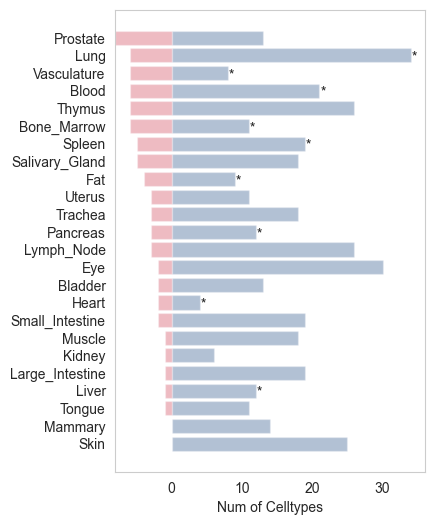

In [8]:
import matplotlib.pyplot as plt
# fig = plt.figure(figsize=(4,6),dpi = 150)
fig, ax = plt.subplots(figsize=(4, 6))  # 设置图形大小
categories = result_rela_notrela_ctnums_sorted.index
star_categories = results_tissue_related_tissues
plt.barh(result_rela_notrela_ctnums_sorted.index, result_rela_notrela_ctnums_sorted["related"], left=-np.array(result_rela_notrela_ctnums_sorted["related"]), color='#c91f37',alpha = 0.3)
plt.barh(result_rela_notrela_ctnums_sorted.index, result_rela_notrela_ctnums_sorted["not related"], left = 0, color='#003472',alpha = 0.3)
plt.xlabel("Num of Celltypes")
# 添加星号
# 添加星号
for i, category in enumerate(categories):
    if category in star_categories:
        ax.text(result_rela_notrela_ctnums_sorted["not related"][i]+0.5, i-0.5 , '*', ha='center', va='bottom')
        # categories[i] += '*'
plt.grid(False)
plt.show()